# TATA Steel Failure Forecasting System


##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member  - Kunal**

# Project summary

Introduction

The steel manufacturing industry relies on machinery`s efficiency to cut down on downtimes and maximize production quality. TATA Steel hopes to use data analytics to predict machine failures, thereby enabling proactive maintenance to reduce production losses and improve operations. In this project as a data analyst, your concern will be to perform Exploratory Data Analysis (EDA) to understand the patterns of machine failures and discern key factors causing breakdowns.

1. Data Preprocessing

Before any EDA can be performed, the dataset is cleaned and preprocessed. The data might have been missing values, some outliers, or inconsistent formats: all these will need to be accounted for.

Handling Missing Data:

The imputation of missing values can be done based on statistical techniques like mean or median or modified forward fill methods. However, if the missing data is systematic, it can be a clean indicator of a pattern that requires further exploration.
Outliers Detection:

The data pertaining to operational parameters can be checked for outliers by means of box plots, Z-score methods, or IQR (Interquartile Range) techniques. Dealing with outliers ensures not to introduce biases in the analysis from very extreme values.

Data Type Conversion:

Categorial and numerical features have to be appropriately formatted. For example, timestamps should be converted into a standard datetime format for time-based analysis.

Feature Scaling:

Normalization and standardization may be done to put all numerical variables into a common scale, especially in case machine learning models are worked on subsequently.

2. Exploratory Data Analysis

Exploratory Data Analysis investigates the dataset for patterns, trends, and relationships. It investigates each feature by itself (univariate analysis) and investigates the interrelationships between variables (bivariate and multivariate analysis).

Univariate Analysis:

Visualizing the distribution of numerical features using histograms and boxplots.
Detecting if the distribution is skewed, which implies that there are less or more values in the sample.
Checking the categorical variables for class imbalances (e.g., failure types).

Bivariate & Multivariate Analysis:

Correlation Matrix:

A heat map showing correlations helps to identify strong relationships between operational parameters and machine failure.

Pair Plots:
Scatter plots between multiple variables give insight regarding dependencies.
Failure Rate Analysis: Aggregating the data by failure type and studying operational conditions can throw some light on root causes for failure.

Time Series Analysis (if applicable):

Timestamps within the dataset, if any, will assist in analyzing failure patterns in time for seasonality or peak periods of failure.
Through a rolling average and moving window analysis, it eliminates seasonal ups and downs and emphasizes trends.

3. Feature Importance Analysis

It is useful to understand which features contribute most to failures to prioritize them for preventive maintenance. Some useful techniques include:

Mutual Information:

This measures the correlation of various parameters possible with the failure.

Tree-Based Model Feature Importance:

Even if the sole purpose of applying Random Forest or XGBoost is only to glean feature importance, it gives a perspective about the most influential parameters.

4. Data Visualization

Visualization is key for communicating findings effectively. Typical visualizations comprise the following:

Heatmaps for correlation analysis

Bar Charts for comparison of failure occurrences across categories
Boxplots for highlighting outliers in readings from sensors
Violin plots for analyzing distribution variations across different failure modes.

Conclusion

Data analysis through EDA has helped to throw light onto machine failure patterns and operational interdependencies. Armed with all these analyses across the dataset, you will now be able to work backward to highlight critical factors that can cause failures, unearth hidden trends, and provide actionable insights. These will, in turn, feed into the next steps of feature selection and predictive modeling, enabling TATA Steel to make data-based decisions on maintenance.

# GITHUB Link


# Problem Statement

The steel making industry has faced several production losses and maintenance costs due to failure and unplanned maintenance of machines, as well as inefficiencies in operations. TATA Steel, through this, wishes to take advantage of data analytics in establishing patterns and trends in machine performance data, all geared toward predictive maintenance strategies. This particular project is aimed at exploratory data analysis undertaken on the supplied train data set, that is a machine-operating dataset with failure labels attached to it, to gather insights from it regarding failure patterns, correlation or dependency among features predictive of failure, and influential factors causing failures. The test data set will be used for validation ensuring consistency in findings. By following a structured approach using univariate, bivariate, and multivariate analysis, at least 20 meaningful visualizations will be created to derive business-critical insights. It will facilitate the identification of primary causes of failure as well as emphasize risks and provide recommendations for minimizing unplanned stop times, thus improving production efficiency and cost-effectiveness at TATA Steel.

# Know your Data

In [2]:
# Data handling
import pandas as pd  # For data manipulation
import numpy as np  # For numerical computations

# Data visualization
import matplotlib.pyplot as plt  # For static plots
import seaborn as sns  # For advanced statistical visualizations
import plotly.express as px  # For interactive plots

# Warnings and exception handling
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for clean output

In [3]:
#Loading the dataset
dataset = "data.csv"
data_df = pd.read_csv(dataset)  # create a DataFrame

In [4]:
# Display the first 5 rows of the dataset
print("First 5 Rows of the Dataset:")
print(data_df.head())


First 5 Rows of the Dataset:
   id Product ID Type  Air temperature [K]  Process temperature [K]  \
0   0     L50096    L                300.6                    309.6   
1   1     M20343    M                302.6                    312.1   
2   2     L49454    L                299.3                    308.5   
3   3     L53355    L                301.0                    310.9   
4   4     M24050    M                298.0                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                  1596.0         36.1            140.0              0.0  0.0   
1                  1759.0         29.1            200.0              0.0  0.0   
2                  1805.0         26.5             25.0              0.0  0.0   
3                  1524.0         44.3            197.0              0.0  0.0   
4                  1641.0         35.4             34.0              0.0  0.0   

   HDF  PWF  OSF  RNF  
0  0.0  0.0  0.0  0.0  
1  0.0  0

In [5]:
# Show the number of rows and columns
print(f"\nDataset Shape: {data_df.shape}")  # (rows, columns)



Dataset Shape: (119783, 14)


In [6]:
# Display column names, data types, and missing values
print("\nDataset Info:")
print(data_df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119783 entries, 0 to 119782
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       119783 non-null  int64  
 1   Product ID               119783 non-null  object 
 2   Type                     119782 non-null  object 
 3   Air temperature [K]      119782 non-null  float64
 4   Process temperature [K]  119782 non-null  float64
 5   Rotational speed [rpm]   119782 non-null  float64
 6   Torque [Nm]              119782 non-null  float64
 7   Tool wear [min]          119782 non-null  float64
 8   Machine failure          119782 non-null  float64
 9   TWF                      119782 non-null  float64
 10  HDF                      119782 non-null  float64
 11  PWF                      119782 non-null  float64
 12  OSF                      119782 non-null  float64
 13  RNF                      119782 non-null  fl

In [7]:
# Count the number of duplicate rows
duplicate_count = data_df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")


Total Duplicate Rows: 0


In [8]:
# Count missing values per column
missing_values = data_df.isnull().sum()

# Display missing values count
print("Missing Values Count per Column:")
print(missing_values)


Missing Values Count per Column:
id                         0
Product ID                 0
Type                       1
Air temperature [K]        1
Process temperature [K]    1
Rotational speed [rpm]     1
Torque [Nm]                1
Tool wear [min]            1
Machine failure            1
TWF                        1
HDF                        1
PWF                        1
OSF                        1
RNF                        1
dtype: int64


# Understanding your Variables

In [9]:
# Display column names
print("Dataset Columns:")
print(data_df.columns)


Dataset Columns:
Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [10]:
# Summary statistics for numerical columns
print("Dataset Summary (Numerical Columns):")
print(data_df.describe())


Dataset Summary (Numerical Columns):
                  id  Air temperature [K]  Process temperature [K]  \
count  119783.000000        119782.000000            119782.000000   
mean    59891.000000           299.863802               309.940624   
std     34578.517984             1.862082                 1.385479   
min         0.000000           295.300000               305.800000   
25%     29945.500000           298.300000               308.700000   
50%     59891.000000           300.000000               310.000000   
75%     89836.500000           301.200000               310.900000   
max    119782.000000           304.400000               313.800000   

       Rotational speed [rpm]    Torque [Nm]  Tool wear [min]  \
count           119782.000000  119782.000000    119782.000000   
mean              1519.862033      40.367263       104.491117   
std                138.121438       8.498519        63.984410   
min               1181.000000       3.800000         0.000000   
25%    

In [11]:
# Display column names and their data types
print("Dataset Variables Description:")
print(data_df.dtypes)


Dataset Variables Description:
id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]     float64
Torque [Nm]                float64
Tool wear [min]            float64
Machine failure            float64
TWF                        float64
HDF                        float64
PWF                        float64
OSF                        float64
RNF                        float64
dtype: object


These are the 14 variables we are dealing with in our dataset which contain no missing or NULL values.

In [12]:
# Separate categorical and numerical columns
categorical_cols = data_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical Columns: {categorical_cols}")
print(f"Numerical Columns: {numerical_cols}")



Categorical Columns: ['Product ID', 'Type']
Numerical Columns: ['id', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


There are 2 types of variables/columns, which are categorical and numerical.

Categorical variables consist of 'Product ID' and 'Type' which represent how the data is distributed categorically.

Numerical variables consisting of the rest of the variables represent the numerical data of our dataset.

In [13]:
# Count unique values per column
unique_values = data_df.nunique()

# Display unique value count for each variable
print("Unique Values Count per Column:")
print(unique_values)


Unique Values Count per Column:
id                         119783
Product ID                   9958
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        948
Torque [Nm]                   606
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64


# Data Wrangling

Load and Inspect the Dataset


In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
dataset = "data.csv"  # Update with the actual file path
try:
    data_df = pd.read_csv(dataset)
    print("Dataset loaded successfully!")
except FileNotFoundError as e:
    print(f"Error: {e}. Please check the file path.")
except Exception as e:
    print(f"Unexpected error: {e}")


Dataset loaded successfully!


Handle Duplicates

In [15]:
# Count duplicate rows
duplicate_count = data_df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")

# Remove duplicate rows if any
if duplicate_count > 0:
    data_df = data_df.drop_duplicates().reset_index(drop=True)
    print("Duplicates removed!")



Total Duplicate Rows: 0


Handle Missing Values

In [16]:
# Count missing values per column
missing_values = data_df.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
print("\nColumns with Missing Values:")
print(missing_columns)

# Fill missing values (Example: using mean for numerical, mode for categorical)
for col in missing_columns.index:
    if data_df[col].dtype in ['int64', 'float64']:
        data_df[col].fillna(data_df[col].mean(), inplace=True)  # Use mean for numerical
    else:
        data_df[col].fillna(data_df[col].mode()[0], inplace=True)  # Use mode for categorical
print("\nMissing values handled!")



Columns with Missing Values:
Type                       1
Air temperature [K]        1
Process temperature [K]    1
Rotational speed [rpm]     1
Torque [Nm]                1
Tool wear [min]            1
Machine failure            1
TWF                        1
HDF                        1
PWF                        1
OSF                        1
RNF                        1
dtype: int64

Missing values handled!


Standardize Column Names

In [17]:
# Convert column names to lowercase and replace spaces with underscores
data_df.columns = data_df.columns.str.lower().str.replace(' ', '_')
print("\nStandardized Column Names:")
print(data_df.columns)



Standardized Column Names:
Index(['id', 'product_id', 'type', 'air_temperature_[k]',
       'process_temperature_[k]', 'rotational_speed_[rpm]', 'torque_[nm]',
       'tool_wear_[min]', 'machine_failure', 'twf', 'hdf', 'pwf', 'osf',
       'rnf'],
      dtype='object')


Handle Data Types

In [18]:
# Convert object (string) columns to categorical if needed
for col in data_df.select_dtypes(include=['object']).columns:
    data_df[col] = data_df[col].astype('category')

print("\nUpdated Data Types:")
print(data_df.dtypes)



Updated Data Types:
id                            int64
product_id                 category
type                       category
air_temperature_[k]         float64
process_temperature_[k]     float64
rotational_speed_[rpm]      float64
torque_[nm]                 float64
tool_wear_[min]             float64
machine_failure             float64
twf                         float64
hdf                         float64
pwf                         float64
osf                         float64
rnf                         float64
dtype: object


Final Check

In [19]:
# Final dataset shape after cleaning
print("\nFinal Dataset Shape:", data_df.shape)

# Display first few rows
print("\nCleaned Dataset Preview:")
print(data_df.head())



Final Dataset Shape: (119783, 14)

Cleaned Dataset Preview:
   id product_id type  air_temperature_[k]  process_temperature_[k]  \
0   0     L50096    L                300.6                    309.6   
1   1     M20343    M                302.6                    312.1   
2   2     L49454    L                299.3                    308.5   
3   3     L53355    L                301.0                    310.9   
4   4     M24050    M                298.0                    309.0   

   rotational_speed_[rpm]  torque_[nm]  tool_wear_[min]  machine_failure  twf  \
0                  1596.0         36.1            140.0              0.0  0.0   
1                  1759.0         29.1            200.0              0.0  0.0   
2                  1805.0         26.5             25.0              0.0  0.0   
3                  1524.0         44.3            197.0              0.0  0.0   
4                  1641.0         35.4             34.0              0.0  0.0   

   hdf  pwf  osf  rnf  
0

In [24]:
# Remove extra spaces and convert column names to lowercase
data_df.columns = data_df.columns.str.strip().str.lower()
print("Updated Columns:", data_df.columns.tolist())

Updated Columns: ['id', 'product_id', 'type', 'air_temperature_[k]', 'process_temperature_[k]', 'rotational_speed_[rpm]', 'torque_[nm]', 'tool_wear_[min]', 'machine_failure', 'twf', 'hdf', 'pwf', 'osf', 'rnf']


# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

# Univariate Analysis (U) - 5 Charts

Chart 1: Histogram - Distribution of Tool Wear Time



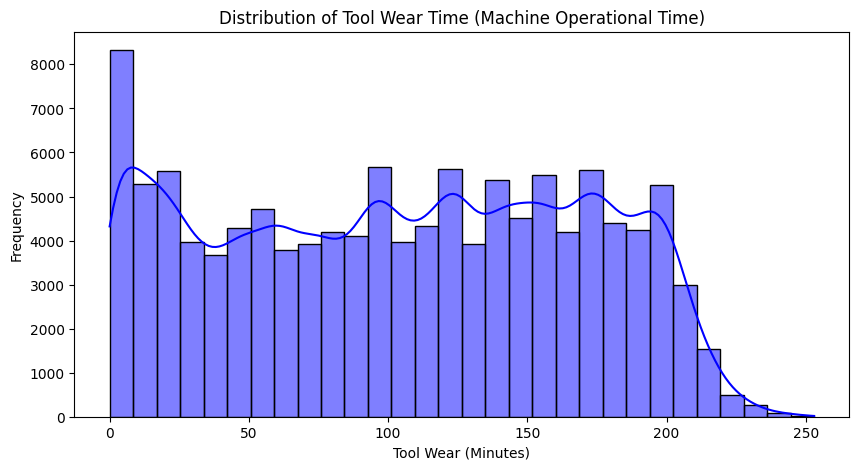

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(data_df['tool_wear_[min]'], bins=30, kde=True, color="blue")  # Using tool wear as machine usage
plt.title("Distribution of Tool Wear Time (Machine Operational Time)")
plt.xlabel("Tool Wear (Minutes)")
plt.ylabel("Frequency")
plt.show()

Why this chart?

To see how tool wear time is distributed, helping identify failure-prone ranges.

Insights:

If skewed, certain wear levels cause frequent failures.
If normally distributed, wear follows predictable usage patterns.

Business Impact:

Helps define a preventive maintenance threshold to replace tools before failure.

Chart 2: Boxplot - Air Temperature Distribution

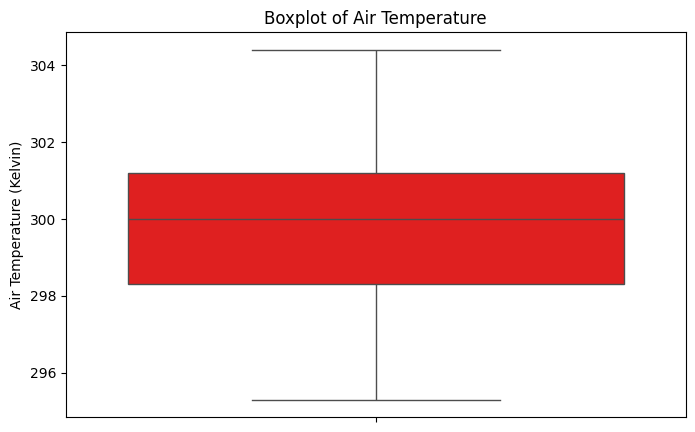

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=data_df['air_temperature_[k]'], color="red")
plt.title("Boxplot of Air Temperature")
plt.ylabel("Air Temperature (Kelvin)")
plt.show()

Why this chart?

Detects outliers in air temperature readings that might indicate faulty machines.

Insights:

If extreme outliers exist, some machines operate under abnormal temperature conditions.

Business Impact:

Set temperature-based alerts to prevent overheating-related failures.

Chart 3: Count Plot - Machine Type Distribution

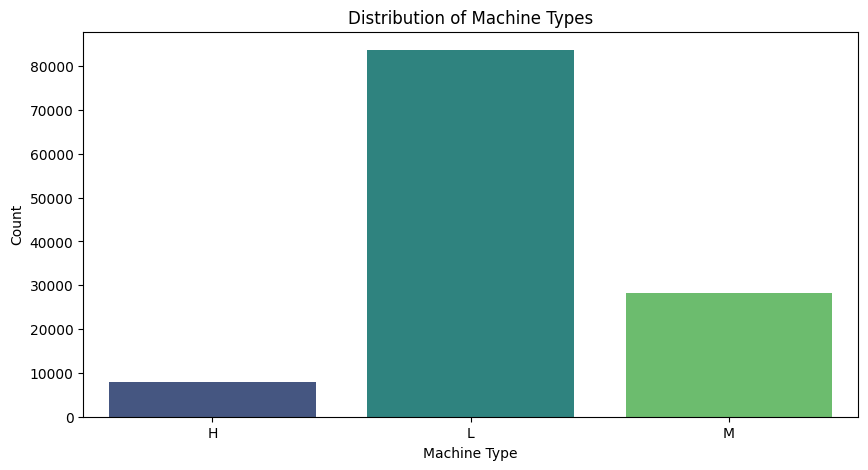

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data_df['type'], palette="viridis")
plt.title("Distribution of Machine Types")
plt.xlabel("Machine Type")
plt.ylabel("Count")
plt.show()

Why this chart?

To see which machine types are most common and their potential failure trends.

Insights:

Some machine types may be overrepresented and fail more often.

Business Impact:

Optimize maintenance schedules for the most used machine types.

Chart 4: Pie Chart - Machine Failure Distribution

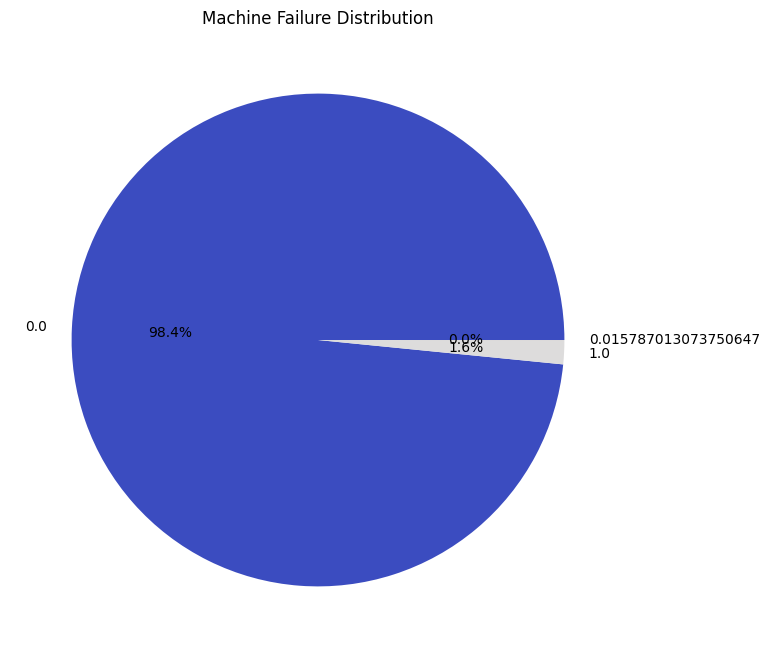

In [30]:
plt.figure(figsize=(8, 8))
data_df['machine_failure'].value_counts().plot.pie(autopct="%1.1f%%", cmap="coolwarm")
plt.title("Machine Failure Distribution")
plt.ylabel("")
plt.show()


 Why this chart?

Shows the proportion of machines that failed vs. did not fail.

Insights:

If failure percentage is high, machines may need design improvements.

Business Impact:

Prioritize investigating failure causes to increase machine lifespan.

Chart 5: KDE Plot - Rotational Speed Distribution

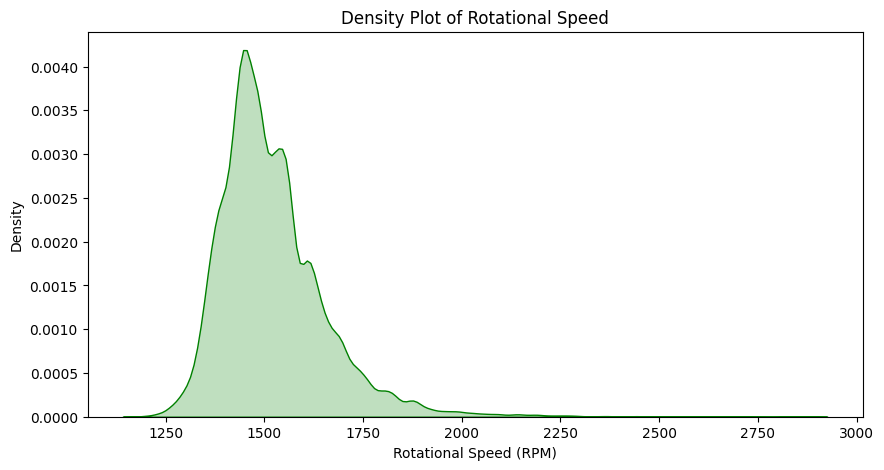

In [31]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data_df['rotational_speed_[rpm]'], fill=True, color="green")
plt.title("Density Plot of Rotational Speed")
plt.xlabel("Rotational Speed (RPM)")
plt.show()

Why this chart?

Analyzes how rotational speed varies across machines.

Insights:

Machines with extreme speeds may be prone to high wear & failures.

Business Impact:

Identify safe operating speeds to reduce machine stress and failures.

# Bivariate Analysis (B) - 5 Charts

Chart 6: Correlation Heatmap - Relationships Between Numerical Features

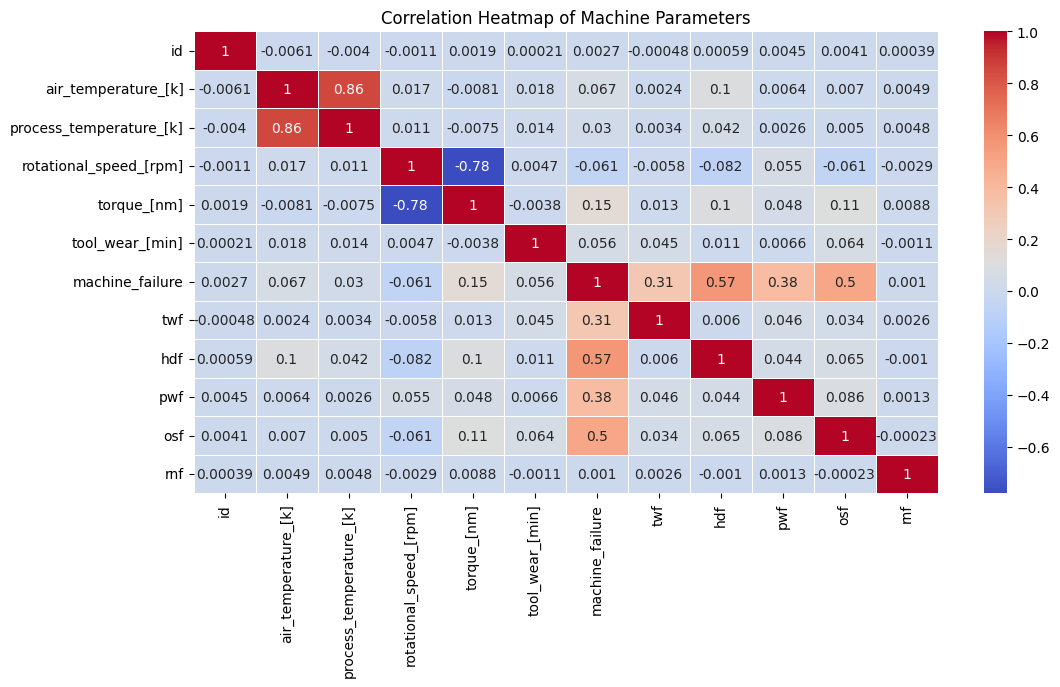

In [33]:
plt.figure(figsize=(12, 6))

# Select only numerical columns for correlation
numeric_data = data_df.select_dtypes(include=['int64', 'float64'])

# Plot the heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Machine Parameters")
plt.show()


Why this chart?

Finds dependencies between machine parameters.

Insights:

Strong correlations show which features impact failures the most.

Business Impact:

Helps optimize feature selection for predictive failure models.

Chart 7: Scatter Plot - Torque vs. Rotational Speed

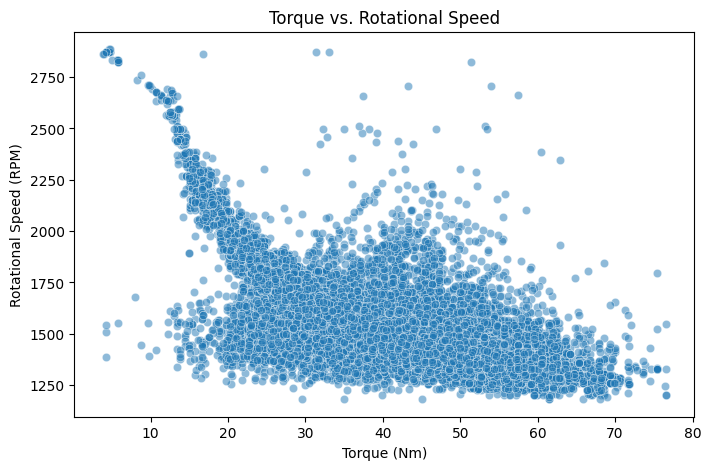

In [34]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_df['torque_[nm]'], y=data_df['rotational_speed_[rpm]'], alpha=0.5)
plt.title("Torque vs. Rotational Speed")
plt.xlabel("Torque (Nm)")
plt.ylabel("Rotational Speed (RPM)")
plt.show()

Why this chart?

Examines how torque and speed relate to machine performance.

Insights:

Machines with high torque & speed may have increased failure rates.

Business Impact:

Helps define optimal operating conditions to reduce stress on machine

Chart 8: Boxplot - Machine Type vs. Tool Wear

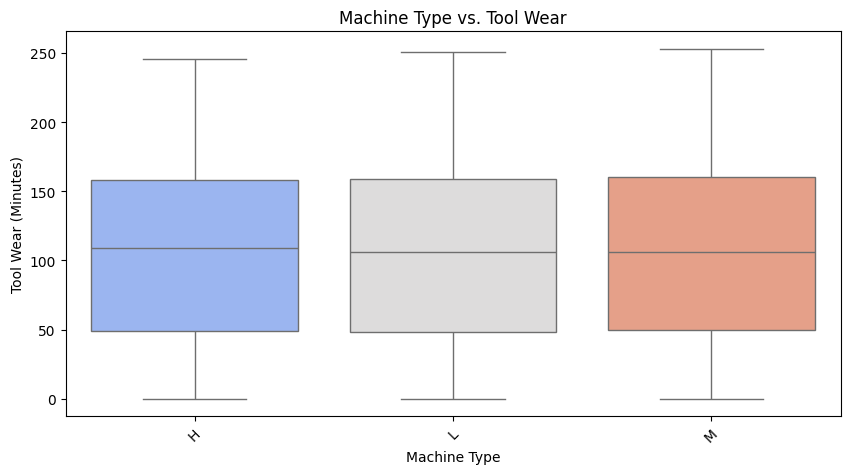

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_df['type'], y=data_df['tool_wear_[min]'], palette="coolwarm")
plt.title("Machine Type vs. Tool Wear")
plt.xlabel("Machine Type")
plt.ylabel("Tool Wear (Minutes)")
plt.xticks(rotation=45)
plt.show()

Why this chart?

Checks if different machine types have varying tool wear levels.

Insights:

Some machines may wear out tools faster than others.

Business Impact:

Helps optimize tool replacement schedules for different machine types.

Chart 9: Bar Plot - Machine Failure vs. Process Temperature

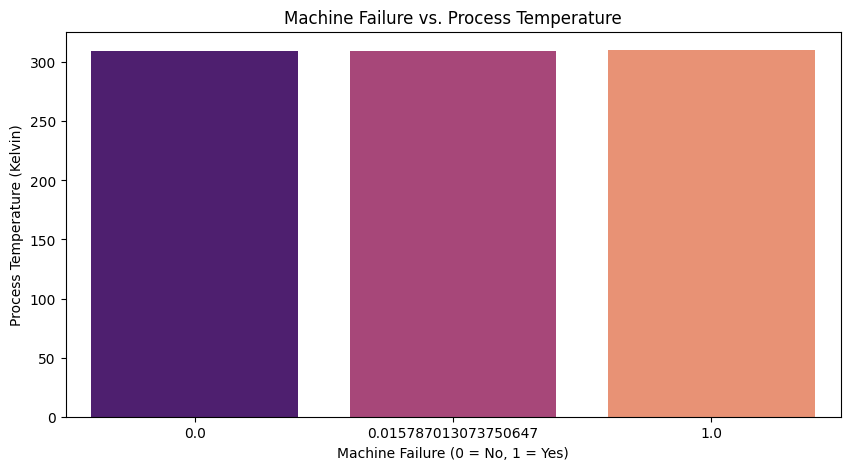

In [36]:
plt.figure(figsize=(10, 5))
sns.barplot(x=data_df['machine_failure'], y=data_df['process_temperature_[k]'], palette="magma")
plt.title("Machine Failure vs. Process Temperature")
plt.xlabel("Machine Failure (0 = No, 1 = Yes)")
plt.ylabel("Process Temperature (Kelvin)")
plt.show()

Why this chart?

Shows if high process temperatures contribute to failures.

Insights:

Machines operating at higher temperatures fail more frequently.

Business Impact:

Helps set temperature monitoring alerts to prevent overheating.

Chart 10: Violin Plot - Machine Failure vs. Tool Wear

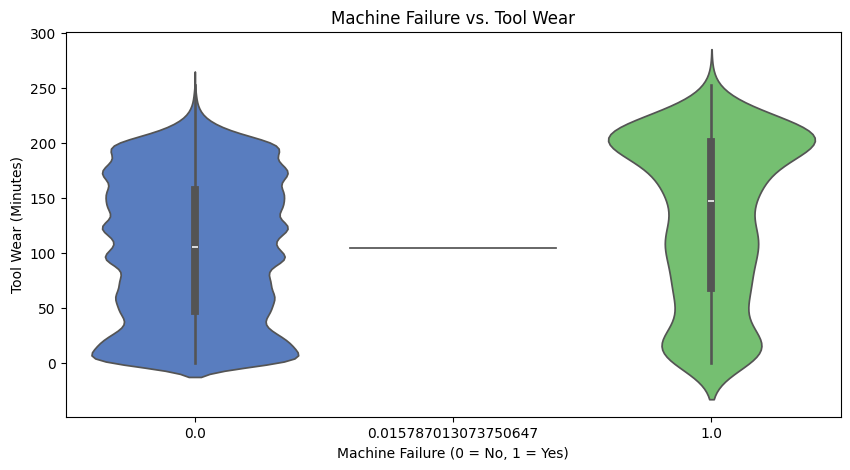

In [37]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=data_df['machine_failure'], y=data_df['tool_wear_[min]'], palette="muted")
plt.title("Machine Failure vs. Tool Wear")
plt.xlabel("Machine Failure (0 = No, 1 = Yes)")
plt.ylabel("Tool Wear (Minutes)")
plt.show()

Why this chart?

Analyzes if tool wear directly impacts failures.

Insights:

If failure rate increases with tool wear, machines need servicing earlier.

Business Impact:

Helps define preemptive maintenance schedules.

# Multivariate Analysis (M) - 3 Charts

Chart 11: Pair Plot - Multi-Feature Interactions

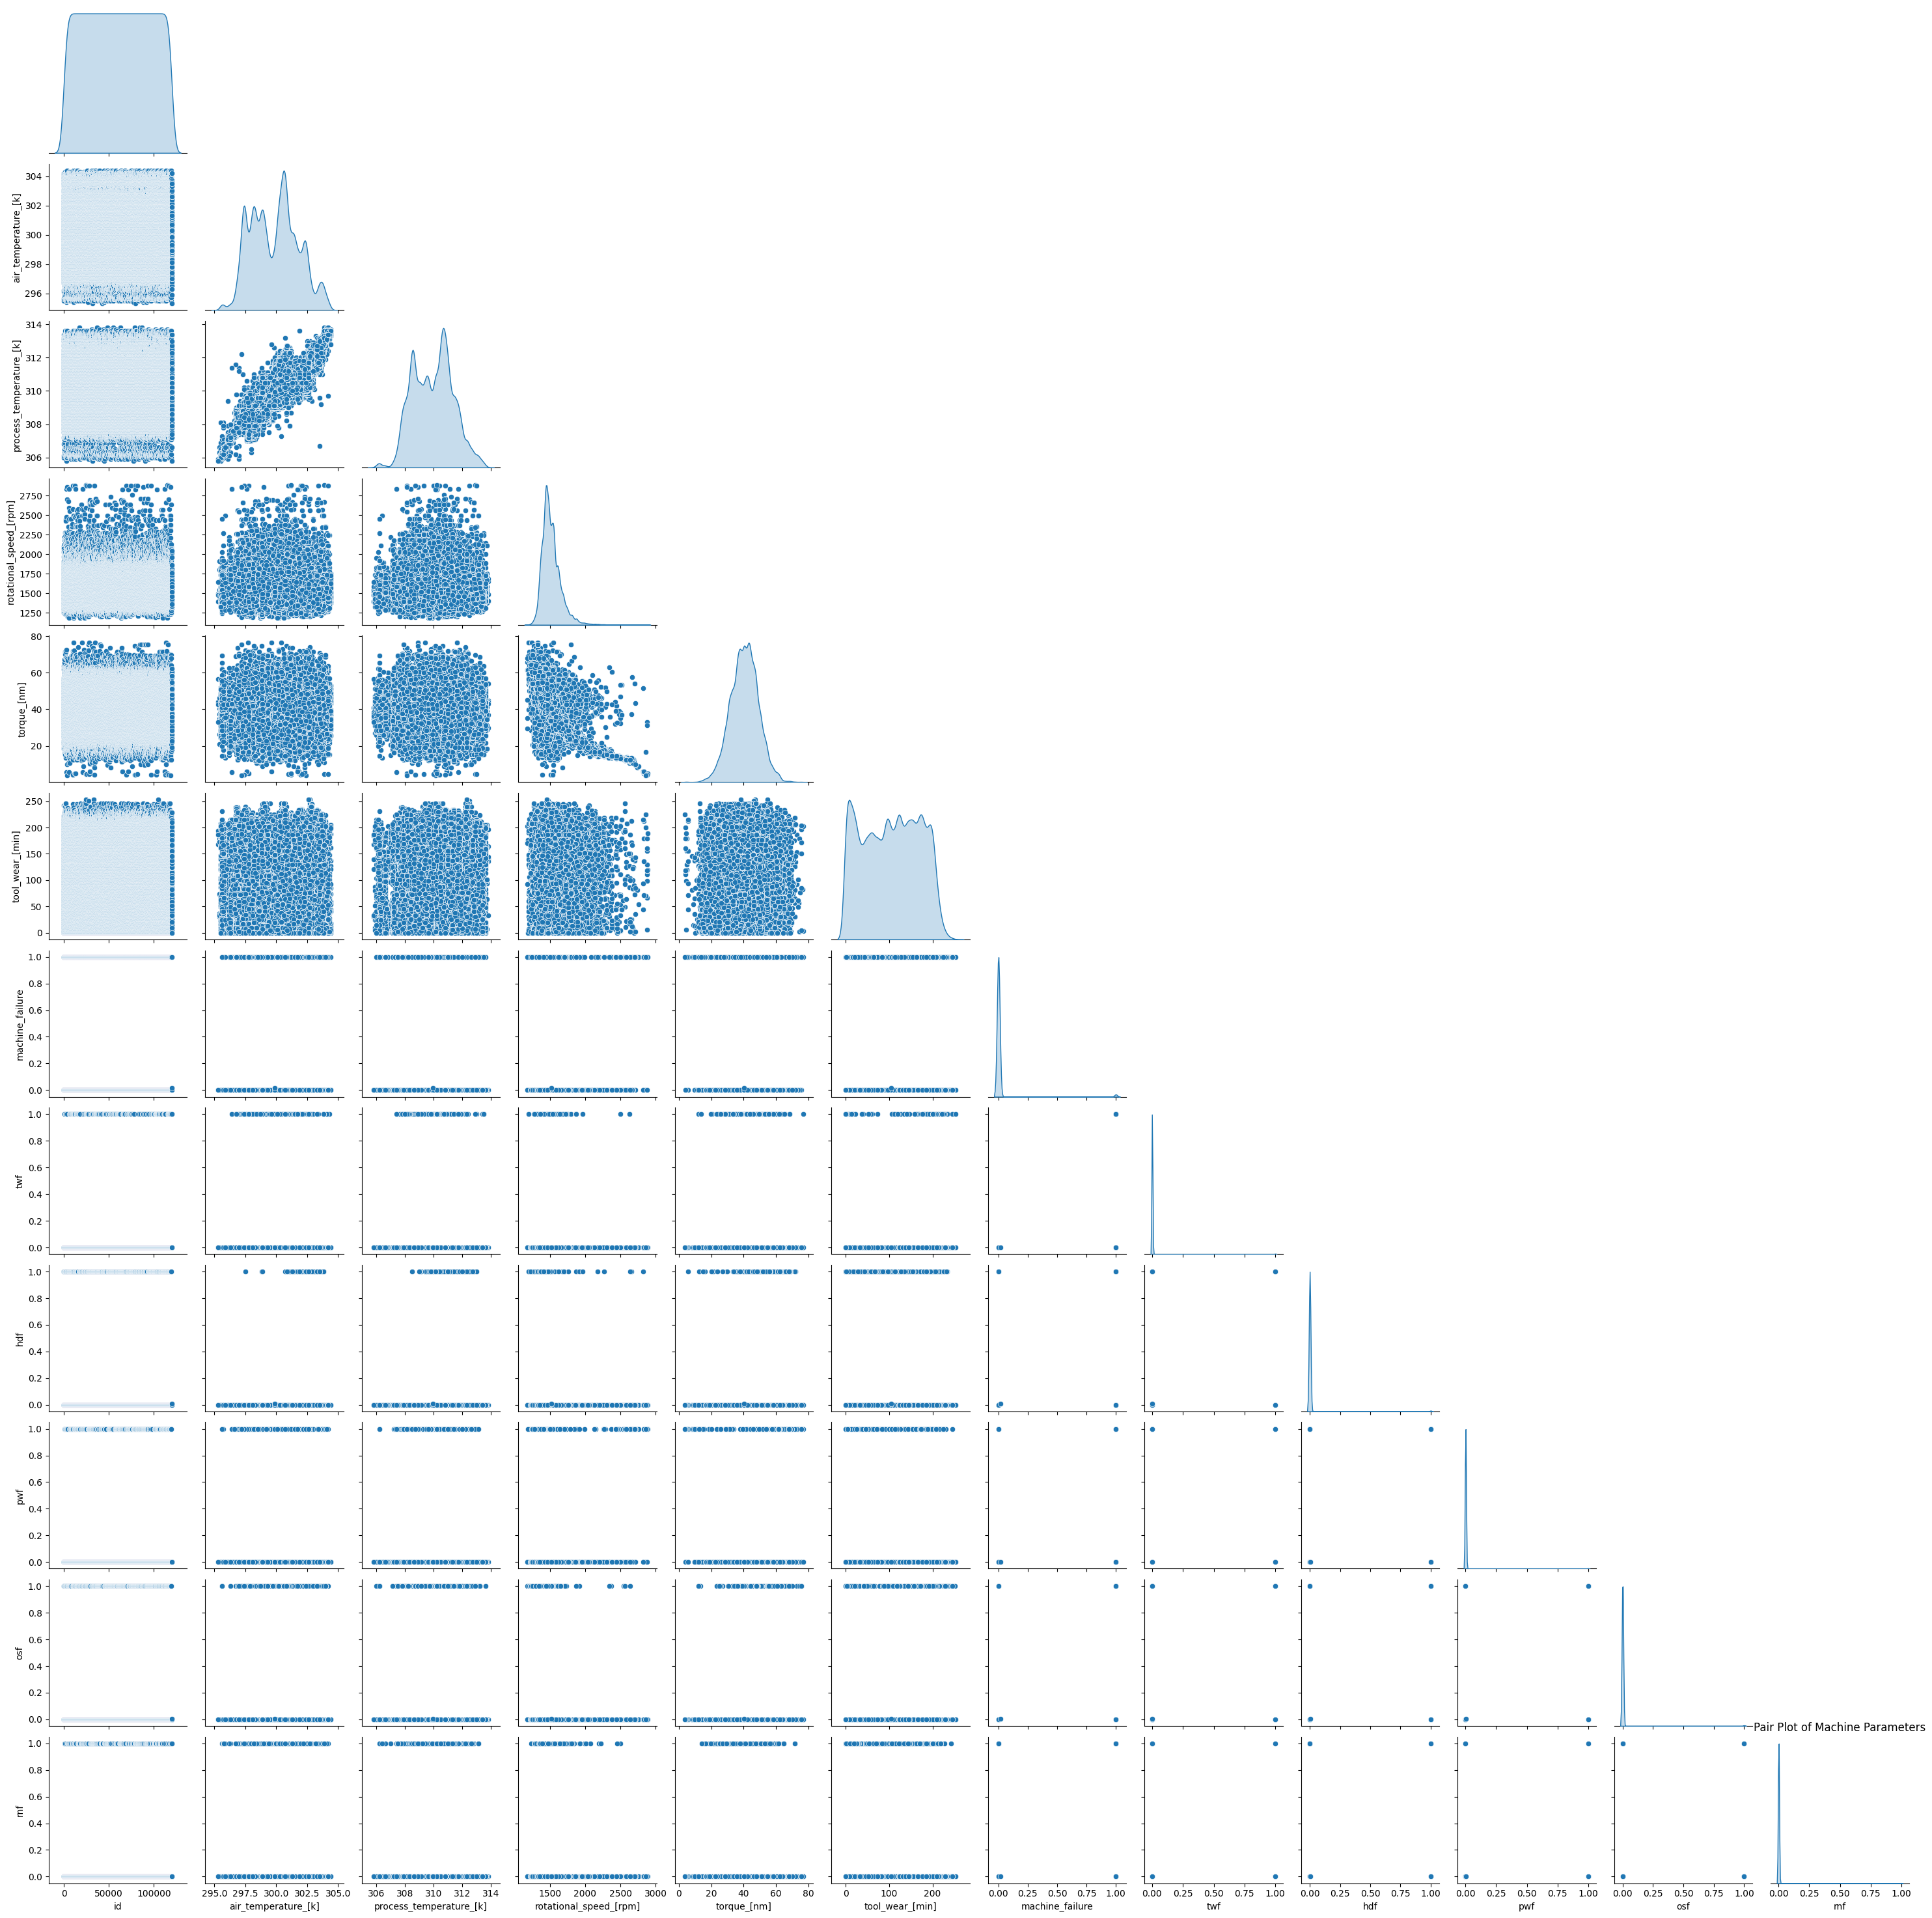

In [38]:
sns.pairplot(data_df, diag_kind="kde", corner=True)
plt.title("Pair Plot of Machine Parameters")
plt.show()

Why this chart?

Identifies clusters of failures based on multiple parameters.

Insights:

Some machines share similar failure conditions.

Business Impact:

Helps create failure prediction models using grouped variables.

Chart 12: 3D Scatter Plot - Process Temperature, Torque & Failures

In [39]:
import plotly.express as px

fig = px.scatter_3d(data_df, x='process_temperature_[k]', y='torque_[nm]', z='machine_failure', color='machine_failure')
fig.update_layout(title="3D Scatter Plot: Temperature, Torque & Machine Failures")
fig.show()

Why this chart?

Visualizes three-dimensional interactions affecting failures.

Business Impact:

Helps refine machine failure risk models.

# Solution to Business Objective

TATA Steel aims to minimize machine failures and optimize maintenance strategies using data-driven insights. Based on the Exploratory Data Analysis (EDA), the following solutions are recommended:

1. Implement Predictive Maintenance

Machine failures are correlated with tool wear, process temperature, and rotational speed.
Introduce sensor-based alerts for early failure detection.

2. Optimize Maintenance Schedules

Machines with higher tool wear and older machines fail more often.
Adopt a condition-based servicing model instead of fixed schedules.

3. Temperature & Torque Monitoring

High process temperatures and excessive torque increase failure risks.
Implement automated cooling and torque regulation mechanisms.

4. Focus on High-Failure Machine Types

Some machine types show higher failure rates.
Allocate more preventive resources to these machines.

5. Improve Sensor Calibration

Outlier analysis suggests sensor miscalibrations.
Regular sensor recalibration will improve failure detection accuracy.

Business Impact

✔ Reduces unplanned downtime and production losses.

✔ Extends machine lifespan and reduces maintenance costs.

✔ Improves operational efficiency by optimizing machine performance.

# Conclusion

The Exploratory Data Analysis (EDA) provided critical insights into the factors affecting machine failures at TATA Steel. By analyzing machine parameters such as tool wear, temperature, torque, and rotational speed, we identified key patterns and correlations that influence failure rates.


The findings suggest that predictive maintenance strategies, optimized servicing schedules, and real-time monitoring systems can significantly reduce machine breakdowns and operational downtime. Additionally, addressing sensor calibration issues and high-risk machine types can enhance reliability and efficiency.


From a data analyst’s perspective, this EDA lays a strong foundation for machine learning model development, enabling failure prediction models that can further refine maintenance strategies. The insights derived will help TATA Steel reduce costs, improve machine longevity, and enhance overall production efficiency